In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')
qb=df[df['Position'] == 'QB']

In [3]:
##In this workbook, we will be working with the Quarterback Position
qbcorr = qb.corr()
qbpos = qbcorr[qbcorr['Overall Rating'] >= 0.5]
qbneg = qbcorr[qbcorr['Overall Rating'] <= -0.5]
print(qbpos['Overall Rating'], qbneg['Overall Rating'])
#Here are the significant correlations for the wide receiver position

Awareness               0.877790
Overall Rating          1.000000
Play Action             0.751264
Stamina                 0.543206
Throw Accuracy Deep     0.738696
Throw Accuracy Mid      0.807725
Throw Accuracy Short    0.778388
Throw on the Run        0.658076
Toughness               0.544370
Name: Overall Rating, dtype: float64 Series([], Name: Overall Rating, dtype: float64)


In [4]:
qbsig = qb[['Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 
           'Throw on the Run', 'Toughness']]
X = add_constant(qbsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#It looks like all of our vif scores are below 5 so we can move on to statistical summary testing

const                   1100.726303
Awareness                  2.773802
Play Action                3.021171
Stamina                    1.794269
Throw Accuracy Deep        3.261559
Throw Accuracy Mid         5.019426
Throw Accuracy Short       4.107700
Throw on the Run           1.731019
Toughness                  1.833983
dtype: float64

In [5]:
QB = sm.OLS(qb['Overall Rating'], qbsig).fit()
print(QB.summary())
#It doesn't look like toughness is significant so we will remove it

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.102e+04
Date:                Tue, 21 Aug 2018   Prob (F-statistic):          3.93e-215
Time:                        20:57:47   Log-Likelihood:                -423.60
No. Observations:                 168   AIC:                             863.2
Df Residuals:                     160   BIC:                             888.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Awareness                0.3767 

In [6]:
qbsig1 = qb[['Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 
           'Throw on the Run']]
QB1 = sm.OLS(qb['Overall Rating'], qbsig1).fit()
print(QB1.summary())
#It looks like Throw Accuracy Short is not a significant variable so we will remove it
#Removing tougness improved the skewness of the data and raised the durbin watson statistic closer to 2

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Tue, 21 Aug 2018   Prob (F-statistic):          3.90e-217
Time:                        20:57:50   Log-Likelihood:                -423.76
No. Observations:                 168   AIC:                             861.5
Df Residuals:                     161   BIC:                             883.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Awareness                0.3798 

In [7]:
qbsig1 = qb[['Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Deep', 'Throw Accuracy Mid',  
           'Throw on the Run']]
QB1 = sm.OLS(qb['Overall Rating'], qbsig1).fit()
print(QB1.summary())
#It looks like Throw Accuracy Short is not a significant variable so we will remove it
#Removing tougness improved the skewness of the data and raised the durbin watson statistic closer to 2

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.477e+04
Date:                Tue, 21 Aug 2018   Prob (F-statistic):          4.87e-219
Time:                        20:57:52   Log-Likelihood:                -424.24
No. Observations:                 168   AIC:                             860.5
Df Residuals:                     162   BIC:                             879.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Awareness               0.3727    

In [8]:
qbsig2 = qb[['Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Mid', 
           'Throw on the Run']]
QB2 = sm.OLS(qb['Overall Rating'], qbsig2).fit()
print(QB2.summary())
#It looks like Throw Accuracy deep is not a significant variable so we will remove it

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.780e+04
Date:                Tue, 21 Aug 2018   Prob (F-statistic):          3.99e-221
Time:                        20:57:54   Log-Likelihood:                -424.38
No. Observations:                 168   AIC:                             858.8
Df Residuals:                     163   BIC:                             874.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Awareness              0.3741      0

In [9]:
def model():
    pv=0.3741*qb['Awareness']+ 0.0912*qb['Play Action'] -0.1413*qb['Stamina']+ 0.2828*qb['Throw Accuracy Mid'] + 0.3891*qb['Throw on the Run']
    return pv

In [10]:
qbcoef = QB2.params
print(qbcoef)

Awareness             0.374073
Play Action           0.091201
Stamina              -0.141282
Throw Accuracy Mid    0.282811
Throw on the Run      0.389116
dtype: float64


In [11]:
awareness_coef = qbcoef[0]
playaction_coef = qbcoef[1]
stamina_coef = qbcoef[2]
throw_accuracy_mid_coef = qbcoef[3]
throw_on_the_run_coef = qbcoef[4]

In [12]:
def modela():
    pv=awareness_coef*qb['Awareness']+ playaction_coef*qb['Play Action'] + stamina_coef*qb['Stamina']+ throw_accuracy_mid_coef*qb['Throw Accuracy Mid'] + throw_on_the_run_coef*qb['Throw on the Run']
    return pv

In [13]:
modela()

1154    75.010292
1155    75.355078
1156    71.342013
1157    72.772155
1158    73.624104
1159    69.856424
1160    63.864588
1161    82.370353
1162    75.819163
1163    66.651860
1164    82.098061
1165    70.534064
1166    68.890835
1167    77.432490
1168    69.733823
1169    68.718093
1170    75.394762
1171    72.312470
1172    73.058114
1173    70.759950
1174    79.516659
1175    73.058382
1176    65.979097
1177    82.897359
1178    73.644675
1179    69.439524
1180    85.765044
1181    70.631945
1182    67.925513
1183    58.597928
          ...    
1292    62.776486
1293    67.378527
1294    61.831300
1295    64.039779
1296    60.194221
1297    73.009344
1298    62.226935
1299    70.842313
1300    54.387744
1301    62.675625
1302    63.461148
1303    69.523881
1304    59.268064
1305    71.232974
1306    67.337762
1307    65.102650
1308    58.638393
1309    73.742019
1310    61.166688
1311    66.310029
1312    70.225710
1313    62.119762
1314    71.270845
1315    66.344307
1316    66

In [14]:
qb['Predicted Value'] = modela()
qb['Residual'] = qb['Predicted Value'] - qb['Overall Rating']

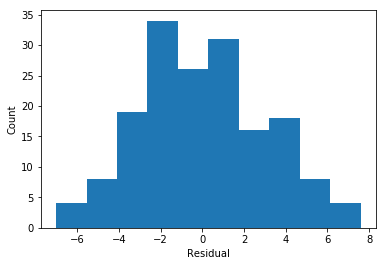

In [15]:
plt.hist(qb['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

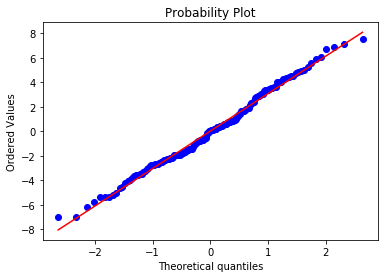

In [16]:
stats.probplot(qb['Residual'], plot=plt)
plt.show()
#The residuals appear to follow the normal distribution

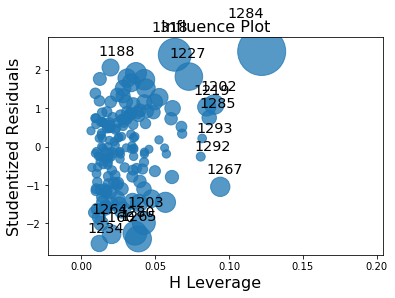

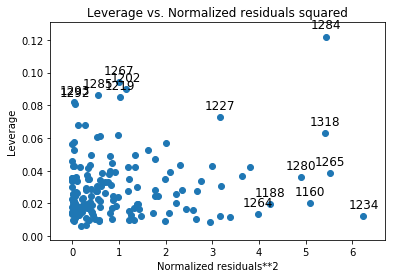

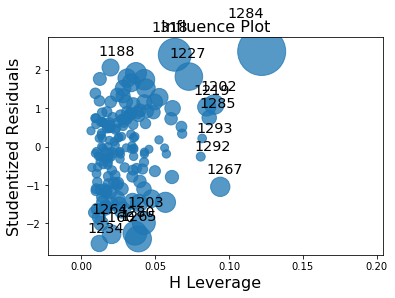

In [17]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(QB2)
influence_plot(QB2)
#It looks like we will need to remove points 1284 and 1234

In [18]:
qbul = qb.drop(df.index[[1284, 1234]])
qbulsig = qbul[['Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Mid', 
           'Throw on the Run']]
QB3 = sm.OLS(qbul['Overall Rating'], qbulsig).fit()
print(QB3.summary())
#It looks like removing the leverage points caused a reduction in the AIC

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.869e+04
Date:                Tue, 21 Aug 2018   Prob (F-statistic):          1.61e-220
Time:                        20:58:06   Log-Likelihood:                -414.02
No. Observations:                 166   AIC:                             838.0
Df Residuals:                     161   BIC:                             853.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Awareness              0.3683      0

In [19]:
def model():
    pv=0.3681*qb['Awareness']+ 0.0876*qb['Play Action'] -0.1561*qb['Stamina']+ 0.2824*qb['Throw Accuracy Mid'] + 0.4140*qb['Throw on the Run']
    return pv

In [20]:
qbcoef = QB3.params
awareness_coef = qbcoef[0]
playaction_coef = qbcoef[1]
stamina_coef = qbcoef[2]
throw_accuracy_mid_coef = qbcoef[3]
throw_on_the_run_coef = qbcoef[4]

In [21]:
modela()

1154    74.810828
1155    75.454169
1156    71.551796
1157    72.759747
1158    73.327589
1159    69.765016
1160    64.062898
1161    82.343299
1162    75.700349
1163    66.909325
1164    82.295135
1165    70.534744
1166    68.835459
1167    77.325738
1168    69.839154
1169    68.840918
1170    75.341964
1171    72.475263
1172    72.857900
1173    71.000238
1174    79.630176
1175    73.210707
1176    66.037564
1177    82.704904
1178    73.560528
1179    69.393320
1180    85.536745
1181    70.374852
1182    68.391394
1183    58.619134
          ...    
1292    62.453587
1293    67.431162
1294    61.645504
1295    64.128799
1296    60.066879
1297    73.068603
1298    62.173977
1299    71.141361
1300    54.464010
1301    62.624557
1302    63.406420
1303    69.765546
1304    59.482890
1305    71.449808
1306    67.463489
1307    65.227409
1308    58.666060
1309    73.747616
1310    61.465374
1311    66.408211
1312    70.518812
1313    62.097595
1314    71.108637
1315    66.163137
1316    66

In [22]:
qbul['Predicted Value'] = modela()
qbul['Residual'] = qbul['Predicted Value'] - qbul['Overall Rating']

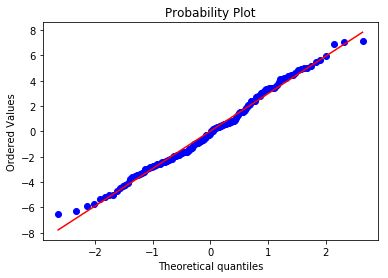

In [23]:
stats.probplot(qbul['Residual'], plot=plt)
plt.savefig('C:\\USers\\tilleymusprime\\Desktop\\probability_plot.png')
plt.show()
#There does not appear to be any outliers in the residuals

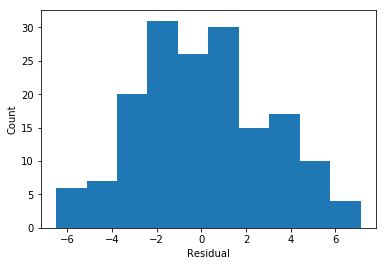

In [24]:
plt.hist(qbul['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

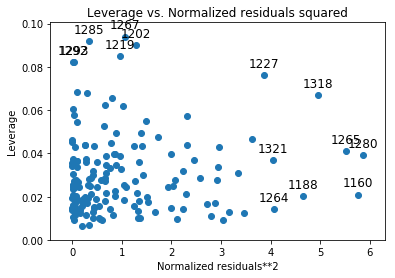

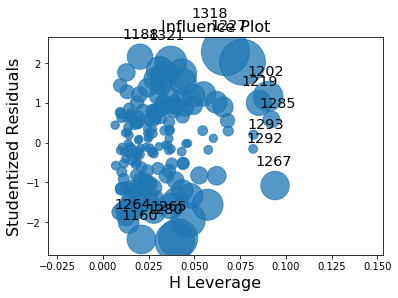

In [25]:
plot_leverage_resid2(QB3)
influence_plot(QB3)
plt.savefig('C:\\Users\\tilleymusprime\\Desktop\\influence_plot.png')
#It doesn't look like there are any high residual, high leverage points left in the data

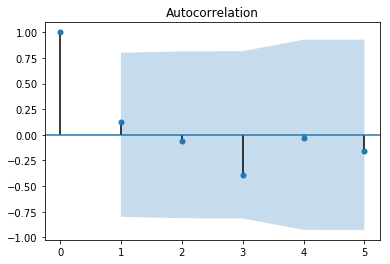

In [26]:
##Next we will double check for autocorrelation.  According to the Durbin Watson statistic, there is not a significant amount
#of auto correlation
qbsigcorr = qbul[['Overall Rating', 'Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Mid', 'Throw on the Run']].corr()
plot_acf(qbsigcorr['Overall Rating'])
#There does not appear to be a significant amount of autocorrelation
plt.savefig('C:\\Users\\tilleymusprime\\Desktop\\autocorrelation.png')

In [27]:
#Finally, we move on to the Breusch Pagan test to check for heteroskedasticity
het_breuschpagan(qbul['Residual'], qbulsig)
#Based on the extremely low p-values, we can reject the null that there is heteroskedasticity present in the model

(65.69540018667271,
 1.8363449734224077e-13,
 21.089679735004466,
 3.4753820162594872e-16)

In [28]:
#Now that we have determined that we can use linear regression, let's run some tests and see how accuract our linear 
#regression model is
X_train, X_test, y_train, y_test = train_test_split(qbulsig, qbul['Overall Rating'], test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
qbcv = cross_val_score(reg, qbulsig, qbul['Overall Rating'], cv=5)
qbcv_mean = np.mean(qbcv)
print(qbcv, qbcv_mean)
#It looks like on average, our model explains 72.04% of the variation in the data

[0.846801   0.89922265 0.94810012 0.79854498 0.23341881] 0.7452175128044979


In [29]:
qbsig8 =  qb[['Overall Rating', 'Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Mid', 'Throw on the Run',
             'Predicted Value', 'Residual']]

In [30]:
qbsig8.describe()

,Overall Rating,Awareness,Play Action,Stamina,Throw Accuracy Mid,Throw on the Run,Predicted Value,Residual
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,70.220238,66.220238,71.089286,91.779762,75.827381,78.434524,70.252765,0.032527
std,8.836116,13.889394,10.874808,3.287475,5.842234,4.474331,8.016898,3.034584
min,57.000000,40.000000,45.000000,85.000000,63.000000,70.000000,54.387744,-7.020873
25%,63.750000,54.000000,63.750000,90.000000,72.000000,75.000000,63.997841,-2.159039
50%,68.500000,66.000000,72.000000,92.000000,75.500000,77.000000,69.519506,0.054177
75%,74.000000,76.000000,77.250000,95.000000,78.000000,81.000000,74.424334,1.983998
max,99.000000,99.000000,99.000000,99.000000,98.000000,97.000000,94.966868,7.589836


In [31]:
qbsigstats=qbsig8.describe()

In [32]:
qbsigstats.to_csv('C:\\Users\\tilleymusprime\\Desktop\\qbsigstasts.csv')

In [33]:
##Predictions
#For this part, we will upload our dataframe with the names that we created during the cleaning section
mn = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean_name.csv')
mn_qb = mn[mn['Position'] == 'QB']
mn_qb = mn_qb[['Name', 'Overall Rating', 'Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Mid', 'Throw on the Run']]
mn_qb['Predicted Value'] = modela()
mn_qb['Differentials'] = mn_qb['Predicted Value'] - mn_qb['Overall Rating']
overrated_qb = mn_qb.sort_values('Differentials', ascending=True)

In [34]:
underratted_qb = mn_qb.sort_values('Differentials', ascending=False)
underratted_qb[0:5]

,Name,Overall Rating,Awareness,Play Action,Stamina,Throw Accuracy Mid,Throw on the Run,Predicted Value,Differentials
1234,Dan Orlovsky,65,75,74,90,74,76,72.550824,7.550824
1280,B.J. Daniels,57,49,66,92,71,83,64.127141,7.127141
1160,Connor Shaw,57,51,69,94,73,80,64.062898,7.062898
1265,Shaun Hill,68,80,85,92,78,73,74.910967,6.910967
1264,Bruce Gradkowski,69,77,72,90,78,78,74.933962,5.933962


In [35]:
overrated_qb[0:5]

,Name,Overall Rating,Awareness,Play Action,Stamina,Throw Accuracy Mid,Throw on the Run,Predicted Value,Differentials
1284,Peyton Manning,92,99,80,99,90,75,84.145437,-7.854563
1318,Michael Vick,79,64,85,95,73,85,72.508974,-6.491026
1188,Andrew Luck,90,85,88,97,87,85,83.704036,-6.295964
1321,Tyler Wilson,67,46,63,95,77,77,61.140095,-5.859905
1227,Tom Brady,99,99,99,99,98,87,93.269776,-5.730224
